In [1]:
# Dependencies
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import os

from sqlalchemy import create_engine, inspect, func, desc
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base

In [2]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [4]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [5]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurements', 'stations']

In [6]:
# Assign the measurements class to a variable called `Measurement`
Measurement = Base.classes.measurements

# Assign the stations class to a variable called `Stations`
Station = Base.classes.stations

In [7]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [8]:
# Using the inspector to print the column names within the 'measurements' table and its types
columns = inspector.get_columns('measurements')
for column in columns:
    print(column["name"], column["type"])

measurement_id INTEGER
station VARCHAR
date VARCHAR
prcp FLOAT
tobs INTEGER


In [9]:
# Using the inspector to print the column names within the 'stations' table and its types
columns = inspector.get_columns('stations')
for column in columns:
    print(column["name"], column["type"])

station_id INTEGER
station VARCHAR
name VARCHAR
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# Create a session
session = Session(engine)

# Precipitation Analysis

In [11]:
# Use the session to query the last 12 months of precipitation data.
query = (session
         .query(Measurement.date, Measurement.prcp)
         .order_by(Measurement.date.desc())
         .filter(Measurement.date.between('2017-02-23', '2017-08-23'))
         .all())


for row in query:
    print(row)

('2017-08-23', 0.0)
('2017-08-23', 0.0)
('2017-08-23', 0.08)
('2017-08-23', 0.45)
('2017-08-22', 0.0)
('2017-08-22', 0.0)
('2017-08-22', 0.5)
('2017-08-21', 0.0)
('2017-08-21', 0.02)
('2017-08-21', 0.56)
('2017-08-20', 0.0)
('2017-08-20', 0.01)
('2017-08-19', 0.0)
('2017-08-19', 0.0)
('2017-08-19', 0.09)
('2017-08-18', 0.0)
('2017-08-18', 0.0)
('2017-08-18', 0.06)
('2017-08-17', 0.0)
('2017-08-17', 0.05)
('2017-08-17', 0.01)
('2017-08-17', 0.13)
('2017-08-16', 0.0)
('2017-08-16', 0.07)
('2017-08-16', 0.12)
('2017-08-16', 0.42)
('2017-08-15', 0.02)
('2017-08-15', 0.0)
('2017-08-15', 0.06)
('2017-08-15', 0.32)
('2017-08-15', 0.42)
('2017-08-14', 0.0)
('2017-08-14', 0.01)
('2017-08-14', 0.08)
('2017-08-14', 0.0)
('2017-08-14', 0.22)
('2017-08-13', 0.0)
('2017-08-13', 0.0)
('2017-08-13', 0.0)
('2017-08-12', 0.0)
('2017-08-12', 0.0)
('2017-08-12', 0.14)
('2017-08-11', 0.0)
('2017-08-11', 0.0)
('2017-08-11', 0.0)
('2017-08-10', 0.0)
('2017-08-10', 0.0)
('2017-08-10', 0.0)
('2017-08-10', 0.07

In [12]:
# Load the results into a pandas dataframe. Set the index to the `date`
df = pd.DataFrame(query, columns=['date', 'prcp'])
df.set_index('date', inplace=True, )
df.head(10)

,prcp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00
2017-08-22,0.00
2017-08-22,0.50
2017-08-21,0.00
2017-08-21,0.02


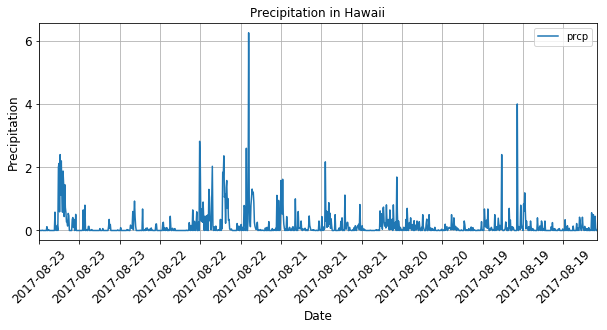

In [13]:
# Plot the dataframe as a bar chart using pandas plotting
ax = df.iloc[::-1].plot(title='Precipitation in Hawaii', subplots=False, legend=True, figsize=(10,4), 
                        fontsize=12, rot=45, grid=True)
ax.set_xticklabels(df.index, rotation=45)
ax.xaxis.set_major_locator(ticker.MultipleLocator(70))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Precipitation", fontsize=12)
plt.show()

In [14]:
# Print the summary statistics for the precipitation data
df.describe()

,prcp
count,969.000000
mean,0.165325
std,0.423460
min,0.000000
25%,0.000000
50%,0.010000
75%,0.120000
max,6.250000


# Station Analysis

In [15]:
# Use the session to design query to calculate the total number of stations
stations = session.query(Station)
print(f'Number of stations: {stations.count()} ')

Number of stations: 9 


In [16]:
# Use the session to design a query to find the most active stations.
results = (session
    .query(Measurement.station, func.count(Measurement.station).label('frequency'))
    .group_by(Measurement.station)
    .order_by(desc('frequency')))


for row in results:
    print(row)

('USC00519281', 2772)
('USC00513117', 2696)
('USC00519397', 2685)
('USC00519523', 2572)
('USC00516128', 2484)
('USC00514830', 1937)
('USC00511918', 1932)
('USC00517948', 683)
('USC00518838', 342)


In [17]:
# Use the session to query the last 12 months of temperature observation data.
query = (session
         .query(Measurement.date, Measurement.tobs)
         .order_by(Measurement.date.desc())
         .filter(Measurement.date.between('2017-02-23', '2017-08-23'))
         .filter(Measurement.station == 'USC00519281')
         .all())

for row in query:
    print(row)

('2017-08-18', 79)
('2017-08-17', 76)
('2017-08-16', 76)
('2017-08-15', 77)
('2017-08-14', 77)
('2017-08-13', 77)
('2017-08-06', 83)
('2017-08-05', 82)
('2017-08-04', 77)
('2017-07-31', 76)
('2017-07-30', 81)
('2017-07-29', 82)
('2017-07-28', 81)
('2017-07-27', 76)
('2017-07-26', 75)
('2017-07-25', 77)
('2017-07-24', 75)
('2017-07-23', 82)
('2017-07-22', 77)
('2017-07-21', 77)
('2017-07-20', 77)
('2017-07-19', 76)
('2017-07-18', 76)
('2017-07-17', 76)
('2017-07-16', 80)
('2017-07-15', 80)
('2017-07-14', 76)
('2017-07-13', 74)
('2017-07-12', 74)
('2017-07-11', 72)
('2017-07-10', 69)
('2017-07-09', 78)
('2017-07-08', 78)
('2017-07-07', 75)
('2017-07-06', 74)
('2017-07-05', 77)
('2017-07-04', 78)
('2017-07-03', 76)
('2017-07-02', 81)
('2017-07-01', 79)
('2017-06-30', 76)
('2017-06-29', 76)
('2017-06-28', 77)
('2017-06-27', 76)
('2017-06-26', 73)
('2017-06-25', 71)
('2017-06-24', 77)
('2017-06-23', 72)
('2017-06-22', 72)
('2017-06-21', 74)
('2017-06-20', 72)
('2017-06-19', 72)
('2017-06-18

In [18]:
# Load the results into a pandas dataframe. Set the index to the `date`
df = pd.DataFrame(query, columns=['date', 'tobs'])
df.set_index('date', inplace=True, )
df.head(10)

,tobs
date,
2017-08-18,79
2017-08-17,76
2017-08-16,76
2017-08-15,77
2017-08-14,77
2017-08-13,77
2017-08-06,83
2017-08-05,82
2017-08-04,77


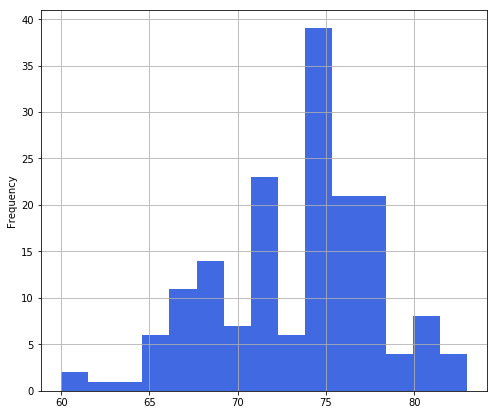

In [19]:
# Plot the dataframe as a bar chart using pandas plotting
ax = df['tobs'].hist(stacked=True, bins=15, color='royalblue', figsize=(8,7))
ax.set_ylabel("Frequency")
plt.show()